Transaction ID: A unique identifier for each transaction, allowing tracking and reference.

Date: The date when the transaction occurred, providing insights into sales trends over time.

Customer ID: A unique identifier for each customer, enabling customer-centric analysis.

Gender: The gender of the customer (Male/Female), offering insights into gender-based purchasing patterns.

Age: The age of the customer, facilitating segmentation and exploration of age-related influences.

Product Category: The category of the purchased product (e.g., Electronics, Clothing, Beauty), helping understand product preferences.

Quantity: The number of units of the product purchased, contributing to insights on purchase volumes.

Price per Unit: The price of one unit of the product, aiding in calculations related to total spending.

Total Amount: The total monetary value of the transaction, showcasing the financial impact of each purchase.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/retail_sales_dataset.csv')

df['Product_Category'] = df['Product Category']
df.drop('Product Category', axis=1, inplace=True)

df['Total_Amount'] = df['Total Amount']
df.drop('Total Amount', axis=1, inplace=True)

df['Price_Per_Unit'] = df['Price per Unit']
df.drop('Price per Unit', axis=1, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

df['Customer ID'] = df['Customer ID'].str.replace('CUST', '').astype(int)

df['Customer_ID'] = df['Customer ID']
df.drop('Customer ID', axis=1, inplace=True)

df['Transaction_ID'] = df['Transaction ID']
df.drop('Transaction ID', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Gender            1000 non-null   object        
 2   Age               1000 non-null   int64         
 3   Quantity          1000 non-null   int64         
 4   Product_Category  1000 non-null   object        
 5   Total_Amount      1000 non-null   int64         
 6   Price_Per_Unit    1000 non-null   int64         
 7   Customer_ID       1000 non-null   int64         
 8   Transaction_ID    1000 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 70.4+ KB


In [ ]:
df.head()

,Date,Gender,Age,Quantity,Product_Category,Total_Amount,Price_Per_Unit,Customer_ID,Transaction_ID
0,2023-11-24,Male,34,3,Beauty,150,50,1,1
1,2023-02-27,Female,26,2,Clothing,1000,500,2,2
2,2023-01-13,Male,50,1,Electronics,30,30,3,3
3,2023-05-21,Male,37,1,Clothing,500,500,4,4
4,2023-05-06,Male,30,2,Beauty,100,50,5,5


In [ ]:
df['Customer_ID'].unique().shape

(1000,)

# How does customer age and gender influence their purchasing behavior?

In [ ]:
df['Product_Category'].value_counts(), df['Gender'].value_counts()

(Product_Category
 Clothing       351
 Electronics    342
 Beauty         307
 Name: count, dtype: int64,
 Gender
 Female    510
 Male      490
 Name: count, dtype: int64)

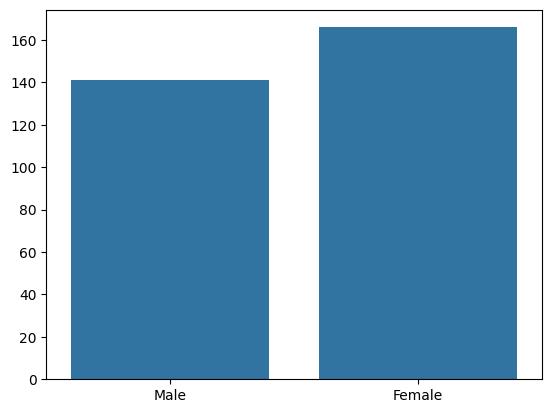

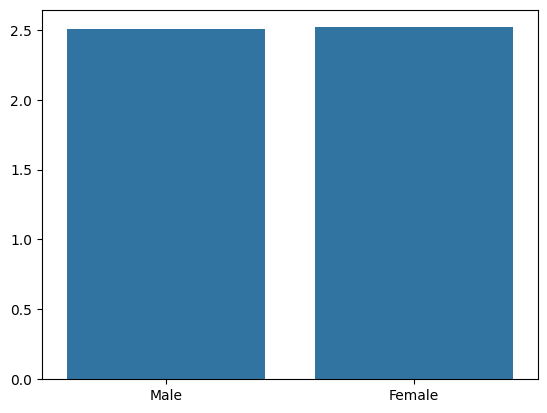

In [ ]:
a = df.query('Product_Category == "Beauty" & Gender == "Male"').value_counts().sum()
b = df.query('Product_Category == "Beauty" & Gender == "Female"').value_counts().sum()

c = df.query('Product_Category == "Beauty" & Gender == "Male"')['Quantity'].mean()
d = df.query('Product_Category == "Beauty" & Gender == "Female"')['Quantity'].mean()

sns.barplot(x=['Male', 'Female'], y=[a, b])
plt.show()

sns.barplot(x=['Male', 'Female'], y=[c, d])
plt.show()
#no difference if amount of each gender who purchase beauty and almost exact;y the same average quantity bough

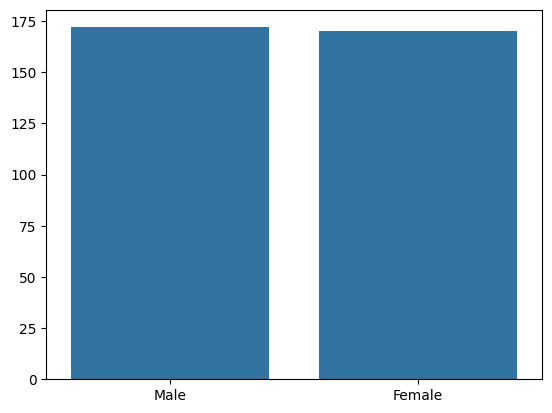

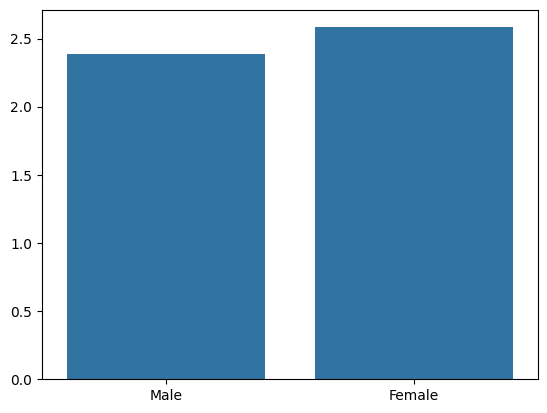

In [ ]:
a = df.query('Product_Category == "Electronics" & Gender == "Male"').value_counts().sum()
b = df.query('Product_Category == "Electronics" & Gender == "Female"').value_counts().sum()

c = df.query('Product_Category == "Electronics" & Gender == "Male"')['Quantity'].mean()
d = df.query('Product_Category == "Electronics" & Gender == "Female"')['Quantity'].mean()

sns.barplot(x=['Male', 'Female'], y=[a, b])
plt.show()

sns.barplot(x=['Male', 'Female'], y=[c, d])
plt.show()

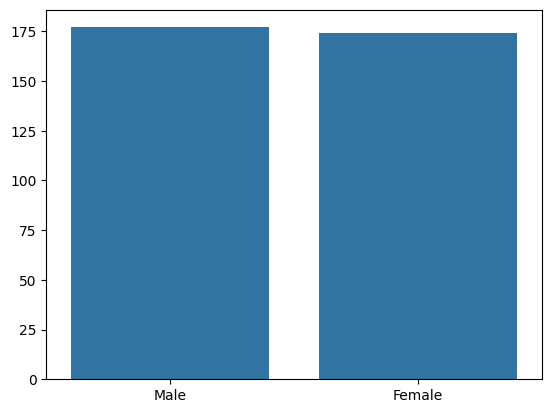

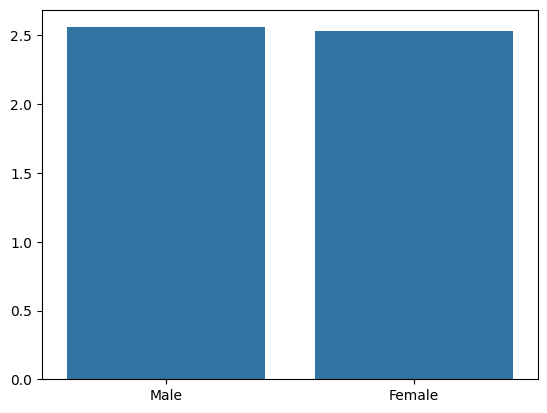

In [ ]:
a = df.query('Product_Category == "Clothing" & Gender == "Male"').value_counts().sum()
b = df.query('Product_Category == "Clothing" & Gender == "Female"').value_counts().sum()

c = df.query('Product_Category == "Clothing" & Gender == "Male"')['Quantity'].mean()
d = df.query('Product_Category == "Clothing" & Gender == "Female"')['Quantity'].mean()

sns.barplot(x=['Male', 'Female'], y=[a, b])
plt.show()

sns.barplot(x=['Male', 'Female'], y=[c, d])
plt.show()

In [ ]:
df.groupby('Gender')['Total_Amount'].mean()

,Total_Amount
Gender,
Female,456.549020
Male,455.428571


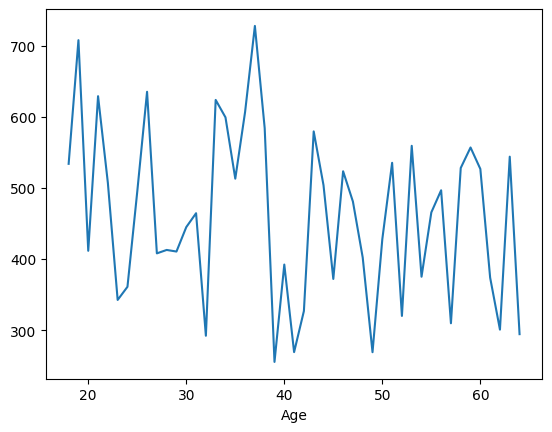

In [ ]:
x = df.groupby('Age')['Total_Amount'].mean().sort_values(ascending=False)

sns.lineplot(x=x.index, y=x.values)
plt.show()

In [ ]:
df.query('Age > 38')['Total_Amount'].mean(), df.query('Age < 38')['Total_Amount'].mean()
# above 38 tends to on average spend $85 more

(418.60243055555554, 503.17283950617286)

<Axes: >

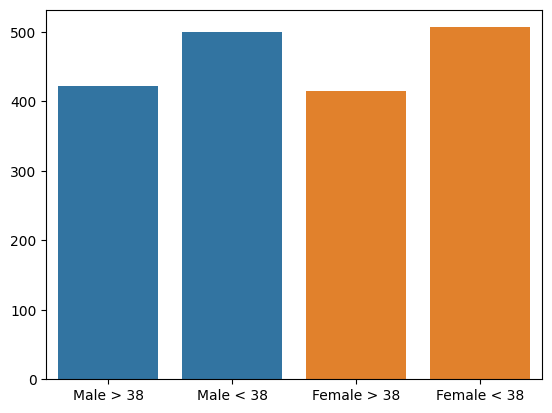

In [ ]:
a = df.query('Age > 38 & Gender == "Male"')['Total_Amount'].mean()
b = df.query('Age < 38 & Gender == "Male"')['Total_Amount'].mean()
c = df.query('Age > 38 & Gender == "Female"')['Total_Amount'].mean()
d = df.query('Age < 38 & Gender == "Female"')['Total_Amount'].mean()

sns.barplot(x=['Male > 38', 'Male < 38'], y=[a, b])

sns.barplot(x=['Female > 38', 'Female < 38'], y=[c, d])

In [ ]:
a = df.query('Age > 38 & Gender == "Male"')['Product_Category'].value_counts()
b = df.query('Age < 38 & Gender == "Male"')['Product_Category'].value_counts()
c = df.query('Age > 38 & Gender == "Female"')['Product_Category'].value_counts()
d = df.query('Age < 38 & Gender == "Female"')['Product_Category'].value_counts()

print(a, b, c, d)

Product_Category
Electronics    107
Clothing        96
Beauty          76
Name: count, dtype: int64 Product_Category
Clothing       78
Beauty         63
Electronics    60
Name: count, dtype: int64 Product_Category
Clothing       112
Electronics     93
Beauty          92
Name: count, dtype: int64 Product_Category
Electronics    73
Beauty         70
Clothing       61
Name: count, dtype: int64


In [ ]:
df.groupby('Gender')['Product_Category'].value_counts()

Gender  Product_Category
Female  Clothing            174
        Electronics         170
        Beauty              166
Male    Clothing            177
        Electronics         172
        Beauty              141
Name: count, dtype: int64

In [ ]:
df.groupby('Age')['Product_Category'].value_counts()

Age  Product_Category
18   Beauty               9
     Clothing             7
     Electronics          5
19   Electronics         11
     Beauty               7
                         ..
63   Clothing             5
     Beauty               3
64   Clothing            13
     Beauty              10
     Electronics          8
Name: count, Length: 141, dtype: int64

# Are there discernible patterns in sales across different time periods?

In [ ]:
df['Date'].unique().shape

(345,)

In [ ]:
df['Month'] = df['Date'].dt.month

<Axes: xlabel='Month', ylabel='Total_Amount'>

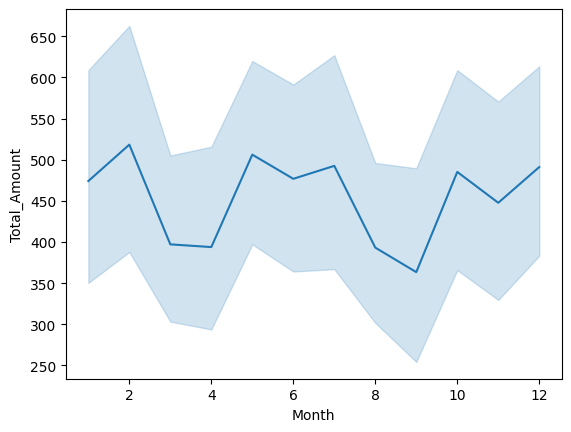

In [ ]:
start_date = '2023-01-01'
end_date = '2023-07-31'

date_range = pd.date_range(start=start_date, end=end_date)

dfDate = df[df['Date'].isin(date_range)]

sns.lineplot(x="Month", y='Total_Amount', data=df)

In [ ]:
df.groupby('Month')['Total_Amount'].mean().sort_values(ascending=False), df.groupby('Month')['Total_Amount'].sum().sort_values(ascending=False)
#looks like months of year do influence amount spent

(Month
 2     518.352941
 5     506.190476
 7     492.569444
 12    491.098901
 10    485.208333
 6     476.818182
 1     474.102564
 11    447.692308
 3     397.123288
 4     393.837209
 8     393.191489
 9     363.384615
 Name: Total_Amount, dtype: float64,
 Month
 5     53150
 10    46580
 12    44690
 2     44060
 1     36980
 8     36960
 6     36715
 7     35465
 11    34920
 4     33870
 3     28990
 9     23620
 Name: Total_Amount, dtype: int64)

Product_Category
Beauty         467.475570
Electronics    458.786550
Clothing       443.247863
Name: Total_Amount, dtype: float64 Product_Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total_Amount, dtype: int64 Product_Category  Month
Beauty            1        13930
                  2        14035
                  3        10545
                  4        11905
                  5        12450
                  6        10995
                  7        16090
                  8         9790
                  9         6320
                  10       15355
                  11        9700
                  12       12400
Clothing          1        13125
                  2        14560
                  3        15065
                  4        13940
                  5        17455
                  6        10170
                  7         8250
                  8        12455
                  9         9975
                  10       13315
    

<Axes: xlabel='Month'>

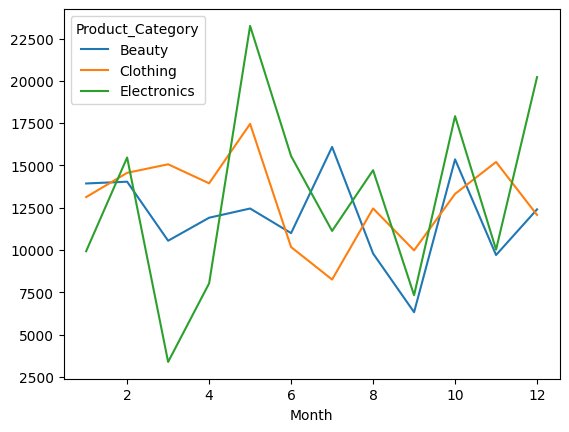

In [ ]:
w = df.groupby('Product_Category')['Total_Amount'].mean().sort_values(ascending=False)
e = df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False)

d = df.groupby(['Product_Category', 'Month'])['Total_Amount'].sum()

print(w, e, d)

sns.lineplot(x='Month', y = d.values, hue=d.index.get_level_values(0), data=d.reset_index())

Month  Product_Category
5      Electronics         40
12     Electronics         40
8      Electronics         38
3      Clothing            38
5      Clothing            37
4      Clothing            36
10     Electronics         35
2      Clothing            33
8      Clothing            32
10     Beauty              31
       Clothing            30
4      Beauty              29
5      Beauty              28
6      Clothing            28
11     Electronics         27
7      Beauty              27
11     Clothing            26
7      Electronics         26
12     Clothing            26
1      Beauty              26
       Clothing            26
2      Beauty              26
       Electronics         26
1      Electronics         26
9      Electronics         25
6      Beauty              25
11     Beauty              25
12     Beauty              25
6      Electronics         24
8      Beauty              24
4      Electronics         21
3      Beauty              21
9      Clothing 

<Axes: xlabel='Month'>

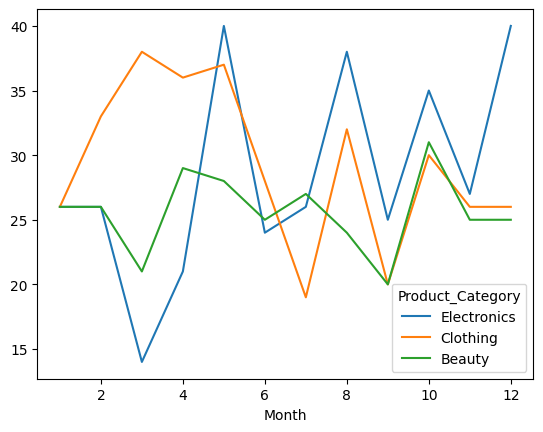

In [ ]:
g = df.groupby('Month')['Product_Category'].value_counts().sort_values(ascending=False)
print(g)
sns.lineplot(x=g.index.get_level_values(0), y=g.values, hue=g.index.get_level_values(1))

In [ ]:
df.groupby('Month')['Quantity'].sum().sort_values(ascending=False)
#quantity is influenced by month

,Quantity
Month,
5,259
10,252
8,227
2,214
4,214
12,207
11,205
1,199
6,197


In [ ]:
df.groupby('Product_Category')['Price_Per_Unit'].value_counts()
#need to identify prices per category now

Product_Category  Price_Per_Unit
Beauty            500               68
                  50                67
                  25                63
                  30                56
                  300               53
Clothing          25                75
                  50                75
                  300               72
                  30                65
                  500               64
Electronics       25                72
                  300               72
                  50                69
                  500               67
                  30                62
Name: count, dtype: int64

In [ ]:
df.groupby('Product_Category')['Price_Per_Unit'].mean()

,Price_Per_Unit
Product_Category,
Beauty,184.055375
Clothing,174.287749
Electronics,181.900585


Month
5     21
12    20
8     14
2     14
10    12
6     12
7     11
11     9
1      8
9      8
4      6
3      4
Name: count, dtype: int64 Month
5     15
11    15
2     13
12    13
3     12
1     12
10    12
6     10
4     10
8     10
7      7
9      7
Name: count, dtype: int64 Month
10    14
7     14
4     12
1     11
3     11
6     10
5     10
12    10
8      9
2      9
11     6
9      5
Name: count, dtype: int64


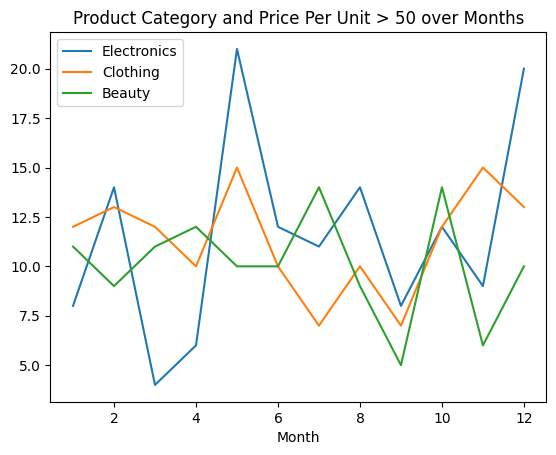

In [ ]:
a = df.query('Product_Category == "Electronics" & Price_Per_Unit > 50')['Month'].value_counts()
b = df.query('Product_Category == "Clothing" & Price_Per_Unit > 50')['Month'].value_counts()
c = df.query('Product_Category == "Beauty" & Price_Per_Unit > 50')['Month'].value_counts()

print(a, b, c)

sns.lineplot(x=a.index, y=a.values, label="Electronics")
sns.lineplot(x=b.index, y=b.values, label="Clothing")
sns.lineplot(x=c.index, y=c.values, label="Beauty")

plt.title('Product Category and Price Per Unit > 50 over Months')
plt.show()

# Which product categories hold the highest appeal among customers?

In [ ]:
df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False)

,Total_Amount
Product_Category,
Electronics,156905
Clothing,155580
Beauty,143515


In [ ]:
df.groupby('Product_Category')['Total_Amount'].mean().sort_values(ascending=False)

,Total_Amount
Product_Category,
Beauty,467.475570
Electronics,458.786550
Clothing,443.247863


In [ ]:
df.groupby('Product_Category')['Quantity'].sum().sort_values(ascending=False)

,Quantity
Product_Category,
Clothing,894
Electronics,849
Beauty,771


In [ ]:
df.groupby('Product_Category')['Quantity'].mean().sort_values(ascending=False)

,Quantity
Product_Category,
Clothing,2.547009
Beauty,2.511401
Electronics,2.482456


# What are the relationships between age, spending, and product preferences?

Product_Category  Age
Electronics       33     1200.000000
Beauty            40      937.500000
Clothing          19      910.000000
Beauty            21      888.888889
                  35      845.833333
                            ...     
Electronics       39       68.000000
                  24       63.333333
Beauty            44       52.500000
                  63       51.666667
Electronics       32       50.000000
Name: Total_Amount, Length: 141, dtype: float64


<Axes: xlabel='Age'>

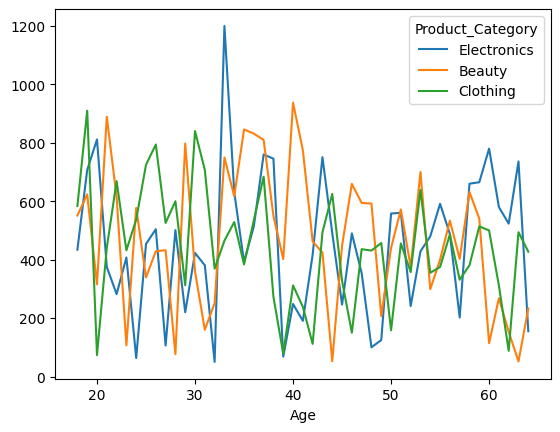

In [ ]:
w = df.groupby(['Product_Category', 'Age'])['Total_Amount'].mean().sort_values(ascending=False)

print(w)

sns.lineplot(x=w.index.get_level_values(1), y=w.values, hue=w.index.get_level_values(0))

# Are there distinct purchasing behaviors based on the number of items bought per transaction?


In [ ]:
df.groupby('Quantity')['Product_Category'].value_counts()

Quantity  Product_Category
1         Electronics         91
          Clothing            88
          Beauty              74
2         Electronics         88
          Clothing            80
          Beauty              75
3         Clothing            86
          Beauty              85
          Electronics         70
4         Clothing            97
          Electronics         93
          Beauty              73
Name: count, dtype: int64

In [ ]:
df.groupby('Quantity')['Total_Amount'].mean()

,Total_Amount
Quantity,
1,177.094862
2,333.539095
3,598.692946
4,706.692015


In [ ]:
df.groupby(['Quantity', 'Product_Category'])['Total_Amount'].sum()

Quantity  Product_Category
1         Beauty              11730
          Clothing            16115
          Electronics         16960
2         Beauty              29930
          Clothing            24670
          Electronics         26450
3         Beauty              52155
          Clothing            48315
          Electronics         43815
4         Beauty              49700
          Clothing            66480
          Electronics         69680
Name: Total_Amount, dtype: int64

In [ ]:
df.groupby(['Quantity', 'Product_Category'])['Total_Amount'].mean()

Quantity  Product_Category
1         Beauty              158.513514
          Clothing            183.125000
          Electronics         186.373626
2         Beauty              399.066667
          Clothing            308.375000
          Electronics         300.568182
3         Beauty              613.588235
          Clothing            561.802326
          Electronics         625.928571
4         Beauty              680.821918
          Clothing            685.360825
          Electronics         749.247312
Name: Total_Amount, dtype: float64

# What insights can be gleaned from the distribution of product prices within each category?

In [ ]:
df.groupby('Product_Category')['Price_Per_Unit'].mean()
#higher priced beauty products are bought more often,
#or lower priced electronics and clothing are bought more often

,Price_Per_Unit
Product_Category,
Beauty,184.055375
Clothing,174.287749
Electronics,181.900585


In [ ]:
df.query('Price_Per_Unit < 300')['Product_Category'].value_counts()
#lower priced clothes are bought more often

(Product_Category
 Clothing       215
 Electronics    203
 Beauty         186
 Name: count, dtype: int64,
 Product_Category
 Beauty         68
 Electronics    67
 Clothing       64
 Name: count, dtype: int64)

How does customer age and gender influence their purchasing behavior?

***Seems like gender doesn't actually influence much in this dataset, but age has some influence. Using 38 as the divider, people below the age of 38, regardless of gender and product category, tend to spend on average about $85 more than people above 38.***

Are there discernible patterns in sales across different time periods?

***Different time periods do seem to influence sales. During May, October, December, and February, totals sales are at least 7,000 dollars more than the other months and those months also are 4 of the top 5 spots in average total sales per customer during that month. For each Month, the total sales for electronics is highest in May, clothing total sales is also highest in May, and total beauty sales is highest in June.***

***Quantity sold is also influenced by time period. May and October show up again as the only months over 250 for quantity of products regardless of type sold in each month. For specific products, quantity of clothing is most during a three month stretch of March, April, and May. Electronics has a few spikes at May, October, December, and August. Beauty stays much more consistent than the others, but spikes during October.***

***The price per unit is different for each product type. Each can cost either 25, 30, 50, 300, or 500 dollars. The months that sells the most products that cost over 50 dollars for Electronics are May and October by a good margin. The other two product types don't have as big a margin between the top the rest, but for Beauty, October is at the top, and for Clothing, May is at the top.***

Which product categories hold the highest appeal among customers?

***Overall, there isn't much spearation in total sales amount, average sale amount, or average quantity bought per product category, but when looking at total quantity bought, there is a separation where clothing is bought a bit more than the others and therefore may be more desirable to customers.***

What are the relationships between age, spending, and product preferences?

***Using age 38 as the divider, people below the age of 38, regardless product category, tend to spend on average about $85 more than people above 38. There seems to not be much trend for total or mean quantity or total sales with age and product category besides that.***

Are there distinct purchasing behaviors based on the number of items bought per transaction?

***On average, as expected, the higher the quantity purchased, the higher the cost. On average, a customer pays the most for electronics in quantites of 1, 3, and 4, but for quantities of 2, beauty is on average the most spent by customers. For total amount spent for each product category and quantity, customers spend the most in quantities 1 and 4 when it's for elctronics and in quantities 2 and 3, customers spend the most for beauty.***

What insights can be gleaned from the distribution of product prices within each category?

***Beauty products have the highest average price per unit bought. The reason for that is because lower priced clothes are bought most often and low priced electronics are bought next most often.***